In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

print(Sequential.add_weight)

# Activation Functions
def linear(x):
    return x

def reLU(x):
    return max(0.0, x)

def leakyReLU(x):
    return max(0.1, x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

# Loss Functions 
def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))	

<function Layer.add_weight at 0x00000205A0FA40D0>


In [2]:
# The layer class
class Layer:

    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid)
    }
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    # forwardProp harusnya
    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

In [3]:
x_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # dim x m
y_train = np.array([[0, 1, 1, 0]]) # 1 x m

m = 4
epochs = 1500

layers = [Layer(2, 3, 'tanh'), Layer(3, 1, 'sigmoid')]
costs = [] # to plot graph 

for epoch in range(epochs):
    A = x_train
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)


# Making predictions
A = x_train
for layer in layers:
    A = layer.feedforward(A)
print(A)

[[0.01470912 0.98667249 0.49432874 0.50207968]]


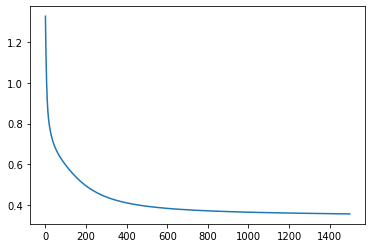

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)
plt.show()